<a href="https://colab.research.google.com/github/NickKornienko/Clustering/blob/main/K_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def k_means(X, n_clusters):
    # Randomly initialize centroids
    np.random.seed(0)
    random_idx = np.random.permutation(X.shape[0])
    centroids = X[random_idx[:n_clusters]]

    # Iterate until convergence
    for _ in range(300):
        # Assign clusters
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_cluster = np.argmin(distances, axis=0)

        # Update centroids
        centroids = np.array([X[closest_cluster==k].mean(axis=0) for k in range(n_clusters)])

    return centroids, closest_cluster

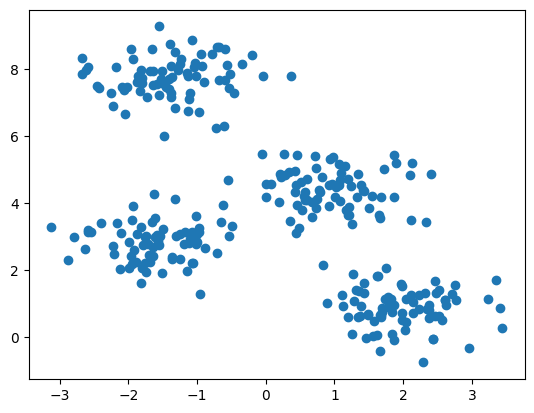

In [2]:
# Synthetic data to test the function
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

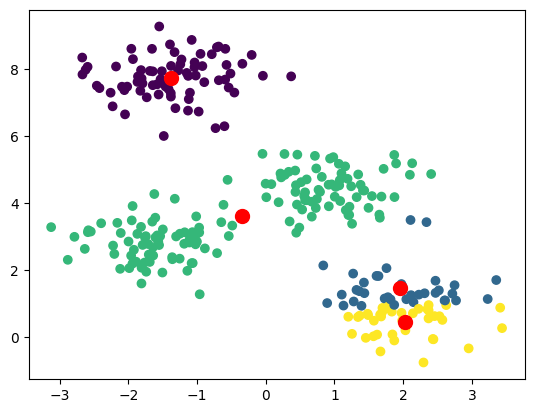

In [3]:
centroids, closest_cluster = k_means(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=closest_cluster)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red')  # mark centroids